In [1]:
import pandas as pd
import numpy as np

In [2]:
data=pd.read_csv("Fraud.csv")

In [4]:
data

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


In [5]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [8]:
data.shape

(6362620, 11)

In [7]:
data['type'].unique()

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

In [6]:
#quick information about data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [10]:
#statical information about data
data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


- There are 6,362,620 observations in the dataset, indicating the total number of transactions or instances in the dataset.
- The mean transaction amount is approximately ₹243.40 .
- The mean initial balance is ₹79,861.90.
- New balance mean ₹855,113.70
- the std of the transaction amount is approximately ₹142.33
- The min amount is ₹0.00, and The max amount is ₹92,445,520.


# EDA

In [13]:
df1=data.groupby(['type','amount'], as_index= False ).count()

In [16]:
df1['type'].value_counts()

CASH_OUT    2173317
PAYMENT     1515212
CASH_IN     1373068
TRANSFER     528820
DEBIT         40448
Name: type, dtype: int64

- More people widraws cash amout
- Debit transactions is very less.

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
# Get the value counts for the 'type' column
type_counts = df1['type'].value_counts()

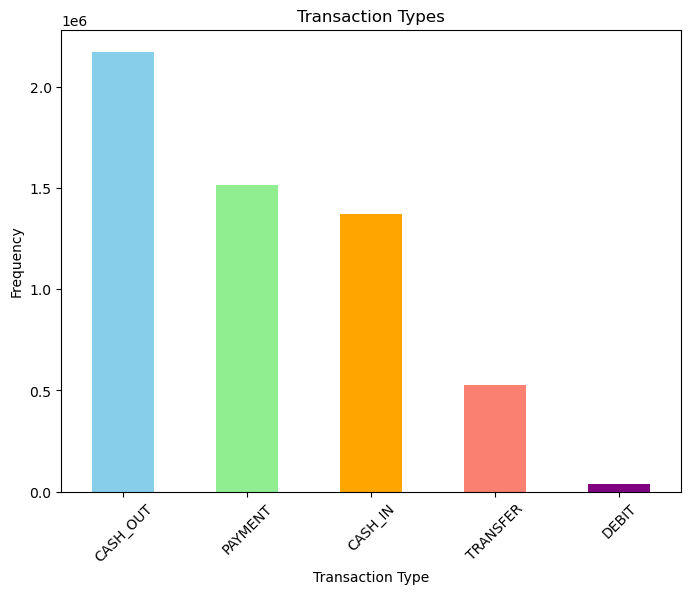

In [31]:
# Create a bar plot
plt.figure(figsize=(8, 6))
colors = ['skyblue', 'lightgreen', 'orange', 'salmon', 'purple']
type_counts.plot(kind='bar', color=colors)
plt.title('Transaction Types')
plt.xlabel('Transaction Type')
plt.ylabel('Frequency')
plt.xticks(rotation=45)  
plt.show()

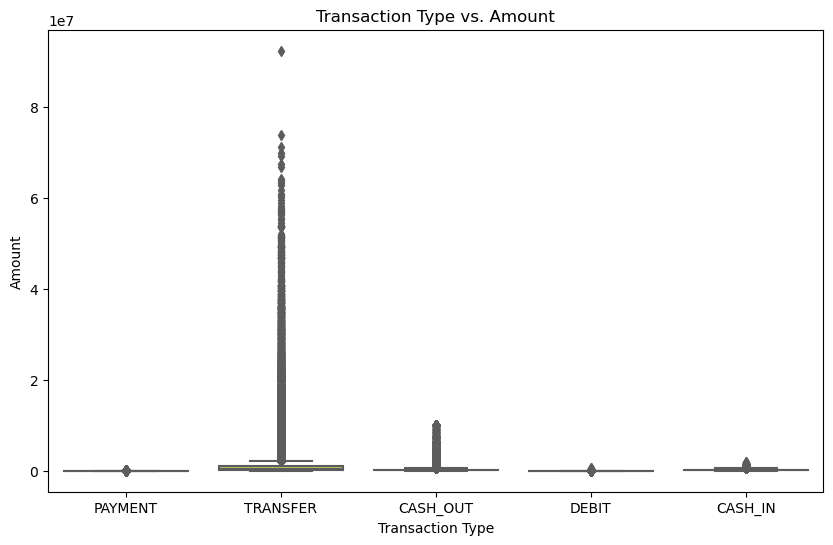

In [39]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='type', y='amount', data=data, palette='hls')
plt.title('Transaction Type vs. Amount')
plt.xlabel('Transaction Type')
plt.ylabel('Amount')
plt.show()

In Transfer amount a single outlier lie we can drop this outlier if needed 

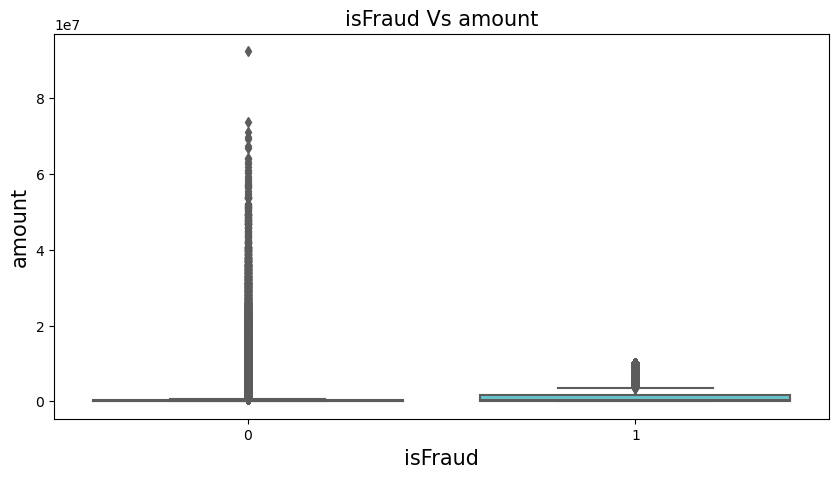

In [48]:
plt.figure(figsize=(10,5))
sns.boxplot(x='isFraud',y='amount',data=data,palette='hls')
plt.title('isFraud Vs amount',fontsize=15)
plt.xlabel('isFraud',fontsize=15)
plt.ylabel('amount',fontsize=15)
plt.show()

In [54]:
data.shape

(6362620, 11)

# Data Preprocessing

In [55]:
#checking missing values
data.isnull()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
6362615,False,False,False,False,False,False,False,False,False,False,False
6362616,False,False,False,False,False,False,False,False,False,False,False
6362617,False,False,False,False,False,False,False,False,False,False,False
6362618,False,False,False,False,False,False,False,False,False,False,False


In [56]:
data.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

- we can easily saw that there is no null value
- if some null value is present in this type of large dataset we can drop those value it not impact your data much.

In [58]:
#checking duplicates data
data.duplicated().sum()

0

there is no duplicate is present in your dataset

In [ ]:
#Handling outlier in the dataset

For handling outlier we have to create a function so we can handle all the outlier from our data 

Basically we using spread of the data in the graph we will define the threshold for make range were your data lie in the spread.
if data lies between 3 std from mean we not consider these data as outlier if not they are treated as outliers and we will remove these outliers from this dataset

In [60]:
def handleoutlier(data , column):
    z_score=np.abs((data[column] - data[column].mean()) / data[column].std())
    threshold=3
    removed_outlier=data[z_score < threshold]
    return removed_outlier

In [61]:
data.head(2)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0


In [63]:
data.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [64]:
columns=['amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest']

In [65]:
#applying fn on dataset
for column in columns:
    data = handleoutlier(data, column)

In [70]:
data

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362612,743,TRANSFER,1258818.82,C1531301470,1258818.82,0.00,C1470998563,0.0,0.00,1,0
6362613,743,CASH_OUT,1258818.82,C1436118706,1258818.82,0.00,C1240760502,503464.5,1762283.33,1,0
6362614,743,TRANSFER,339682.13,C2013999242,339682.13,0.00,C1850423904,0.0,0.00,1,0
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.0,339682.13,1,0


we successfully removed outlier from dataset

In [68]:
#we can observe removing of some data from dataset which is related to outliers.
data.shape

(5684336, 11)

Checking for PCA

In [71]:
data.corr()

C:\Users\Dell\AppData\Local\Temp\ipykernel_8628\2627137660.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
step,1.000000,-0.013423,-0.002068,-0.001340,-0.007117,-0.018357,0.028935,0.000657
amount,-0.013423,1.000000,0.019071,0.027304,0.294507,0.442698,0.052738,0.002137
oldbalanceOrg,-0.002068,0.019071,1.000000,0.991010,0.133006,0.072641,0.012396,0.000574
newbalanceOrig,-0.001340,0.027304,0.991010,1.000000,0.140217,0.068459,-0.010621,0.000531
oldbalanceDest,-0.007117,0.294507,0.133006,0.140217,1.000000,0.973230,-0.009852,-0.000406
newbalanceDest,-0.018357,0.442698,0.072641,0.068459,0.973230,1.000000,-0.005019,-0.000440
isFraud,0.028935,0.052738,0.012396,-0.010621,-0.009852,-0.005019,1.000000,0.021691
isFlaggedFraud,0.000657,0.002137,0.000574,0.000531,-0.000406,-0.000440,0.021691,1.000000


In [73]:
corr_matrix = data.corr()

C:\Users\Dell\AppData\Local\Temp\ipykernel_8628\962194556.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr()


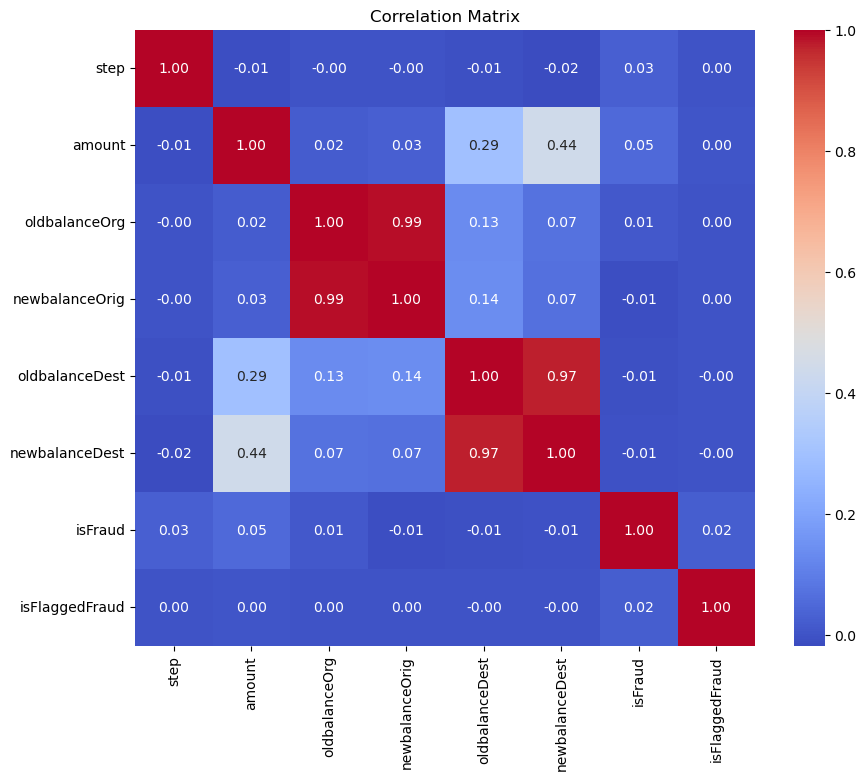

In [74]:
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

Result
- No strong connections (close to 1 or -1) between any pairs of factors, so having multiple variables might not be a big problem in this dataset.

we will perform PCA to handle multi-collinearity after model creation because we don't have high dimention dataset it is easy dataset so we can firstly going without performing PCA

# Feature Selection

In [76]:
data.head(2)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0


Now we will exclude some columns, because columns such as type, nameorig, and namedest may also provide valuable info, but they  require additional preprocessing or feature engineering before being used in the model.

In [78]:
df = data[['amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest','isFraud','isFlaggedFraud']]

The main things that help predict if a customer is committing fraud are:

- Transaction Amount : Fraudsters might make transactions that are very big or very small compared to normal.
- Initial Balance of Customer's Account : If there's a big difference between how much money was in the account before and after the transaction, it could be a sign of fraud.
- Final Balance of Customer's Account : Similar to the initial balance, big changes in the account balance could be suspicious.
- Initial Balance of Receiver's Account : Fraudulent transactions might involve accounts with strangely low or high balances.
- Final Balance of Receiver's Account : Changes in the receiver's account balance after the transaction can also hint at fraud.

In [79]:
df.head(2)

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,9839.64,170136.0,160296.36,0.0,0.0,0,0
1,1864.28,21249.0,19384.72,0.0,0.0,0,0


In [80]:
df.shape

(5684336, 7)

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5684336 entries, 0 to 6362618
Data columns (total 7 columns):
 #   Column          Dtype  
---  ------          -----  
 0   amount          float64
 1   oldbalanceOrg   float64
 2   newbalanceOrig  float64
 3   oldbalanceDest  float64
 4   newbalanceDest  float64
 5   isFraud         int64  
 6   isFlaggedFraud  int64  
dtypes: float64(5), int64(2)
memory usage: 346.9 MB


In [82]:
df['isFraud'].value_counts()

0    5677967
1       6369
Name: isFraud, dtype: int64

In [88]:
#defining dependent and indenpendent variable
X = df.drop('isFraud',axis=1)
y = df['isFraud']

In [89]:
X

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud
0,9839.64,170136.00,160296.36,0.0,0.00,0
1,1864.28,21249.00,19384.72,0.0,0.00,0
2,181.00,181.00,0.00,0.0,0.00,0
3,181.00,181.00,0.00,21182.0,0.00,0
4,11668.14,41554.00,29885.86,0.0,0.00,0
...,...,...,...,...,...,...
6362612,1258818.82,1258818.82,0.00,0.0,0.00,0
6362613,1258818.82,1258818.82,0.00,503464.5,1762283.33,0
6362614,339682.13,339682.13,0.00,0.0,0.00,0
6362615,339682.13,339682.13,0.00,0.0,339682.13,0


In [90]:
y

0          0
1          0
2          1
3          1
4          0
          ..
6362612    1
6362613    1
6362614    1
6362615    1
6362618    1
Name: isFraud, Length: 5684336, dtype: int64

# Model Creation

In [91]:
#Train Test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

we don't know which ML model  going to perform well with fraud detection so we initialize some model and try to fiind best model 

In [92]:
#modelling
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

Initialize Models

In [93]:
models = {
    "Random Forest": RandomForestClassifier(),
    "Logistic Regression": LogisticRegression(),
    "Support Vector Machine": SVC(),
    "Decision Tree": DecisionTreeClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB()
}

In [94]:
# Train models and evaluate all model
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy

In [95]:
# Find best model
best_model = max(results, key=results.get)
best_accuracy = results[best_model]

print("Best model:", best_model)
print("Accuracy:", best_accuracy)

Best model: Logistic Regression
Accuracy: 0.9997015189693784


Now we can saw that LR has highest accuracy and we will implement LR

In [96]:
classifier = LogisticRegression()
classifier.fit(X_train,y_train)

LogisticRegression()

In [97]:
y_pred = classifier.predict(X_test)

In [99]:
Results = pd.DataFrame({'y_test':y_test,'y_pred':y_pred})

In [100]:
Results.head(10)

,y_test,y_pred
3411758,0,0
4909101,0,0
3644775,0,0
2349501,0,0
2751620,0,0
4952750,0,0
1624871,0,0
2887552,0,0
378250,0,0
4995372,0,0


In [102]:
#model accuracy
accu = accuracy_score(y_test,y_pred)

In [103]:
print(accu)

0.9997015189693784


In [104]:
#let's check model accuracy on training set
y_train_pred = classifier.predict(X_train)

In [106]:
accu_training_set=accuracy_score(y_train,y_train_pred)

In [107]:
accu_training_set

0.9996936443132569

In [108]:
from sklearn.metrics import confusion_matrix

In [109]:
#Confusion Matrix result
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[1703032     326]
 [    183    1760]]


Text(95.72222222222221, 0.5, 'True Label')

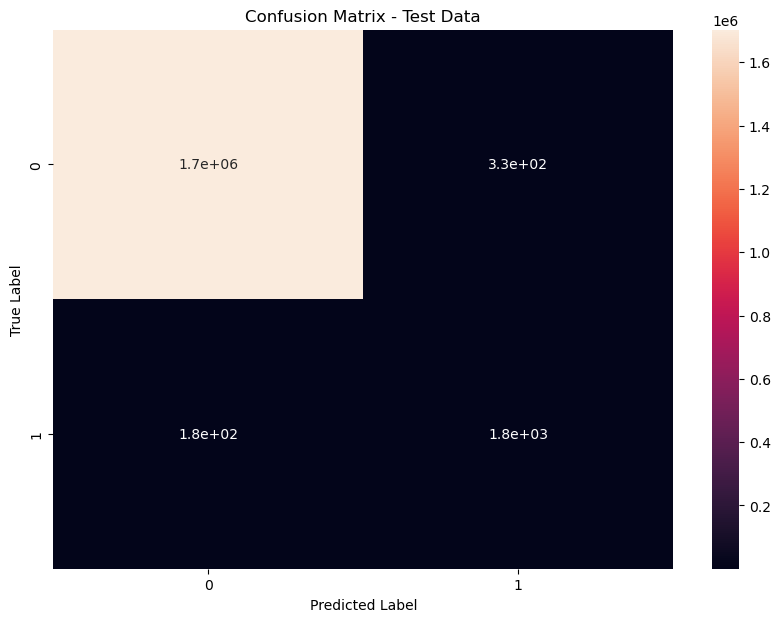

In [111]:
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True)
plt.title('Confusion Matrix - Test Data')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

In [116]:
# Assigning Variables for convinience

TN = cm[0][0]
FP = cm[0][1]
FN = cm[1][0]
TP = cm[1][1]

Calculate metrics values individually or cross check

In [117]:
#for recall
recall = TP / (TP + FN )
print("Recall= ",recall)

Recall=  0.9058157488419969


In [118]:
#for precision
precision = TP / (TP + FP)
print("Precision=",precision)

Precision= 0.8437200383509108


In [119]:
#accuracy
accuracy = ( TP + TN ) / ( TP + TN + FP + FN)
print("Accuracy =" , accuracy)

Accuracy = 0.9997015189693784


In [112]:
from sklearn.metrics import classification_report

In [115]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1703358
           1       0.84      0.91      0.87      1943

    accuracy                           1.00   1705301
   macro avg       0.92      0.95      0.94   1705301
weighted avg       1.00      1.00      1.00   1705301



When a company updates its technology, it's important to take steps to avoid problems-----

- Plan Carefully : Think ahead about what needs to be done and when. Focus on the most important things first.
- Backup Important Stuff: Make copies of important data and have a plan to get it back if something goes wrong.
- Test : Try out the new technology in a safe place before using it for real. This helps catch any problems early.
- Keep Track of Changes : Use a system to keep track of all the updates and make sure everyone knows what's happening.
- Train People : Teach people how to use the new technology so they don't make mistakes.
- Backup Plan : Be ready to switch back to the old way if something doesn't work.

To determine if the preventive actions have been effective, we can follow these steps:

- Monitoring : Keep an eye on things to see if anything goes wrong. Look for any signs of problems.
- User Feedback : Talk to employees and customers to see if they're having any issues or if they think things are better now.
- track Response :  If something does go wrong, see how quickly it gets fixed and if the things put in place to stop problems are helping.
- Compare before and after : Look at how things were before the changes and compare them to now to see if there are any improvements and note every informations.